In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to explore its content and structure
data = pd.read_csv('All Distributed Unfunded Aid by Admit Status 20240314-104043 (1).csv')

# Display the first few rows of the dataframe and the column names to understand the dataset
data.head(), data.columns


(   Unique ID Application Submitted Date                             College  \
 0  999789535                   10/10/23           Albers School of Business   
 1  982505163                   19/12/23           Albers School of Business   
 2  999851695                   31/01/21                College of Education   
 3  978092429                   15/12/23           Albers School of Business   
 4  976965474                   28/03/22  College of Science and Engineering   
 
                                  Application Program Application Start Term  \
 0  Business Administration (Professional) - MBA -...            Winter 2024   
 1           Sport and Entertainment Management - MBA            Winter 2024   
 2  Counseling, Clinical Mental Health Counseling ...              Fall 2021   
 3  Business Administration (Professional) - MBA -...            Winter 2024   
 4          Computer Science Fundamentals Certificate            Winter 2024   
 
                     Decision Reason

In [3]:
data['Application Program'].unique()

array(['Business Administration (Professional) - MBA - Online Instruction',
       'Sport and Entertainment Management - MBA',
       'Counseling, Clinical Mental Health Counseling specialization - MAED',
       'Computer Science Fundamentals Certificate',
       'Accounting and Analytics - MS', 'Computer Science - MSCS',
       'Nonprofit Leadership - MNPL', 'Finance - MSF',
       'Criminal Justice - MACJ', 'Teacher Preparation - MIT',
       'Business Administration (Professional) - MBA',
       'Computer Science, specialization in Software Engineering - MSCS',
       'Kinesiology - MS', 'Mechanical Engineering - MSME',
       'Nurse Practitioner, Family Nurse-Adult Gerontology Primary Care - DNP',
       'Counseling, Clinical Mental Health Counseling specialization - MAED - Online Instruction',
       'School Psychology, Post-Baccalaureate - EDS',
       'Computer Science, specialization in Data Science - MSCS',
       'Student Development Administration - MA', 'Data Science - MSDS

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_16610/981497113.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14, fontweight='bold')


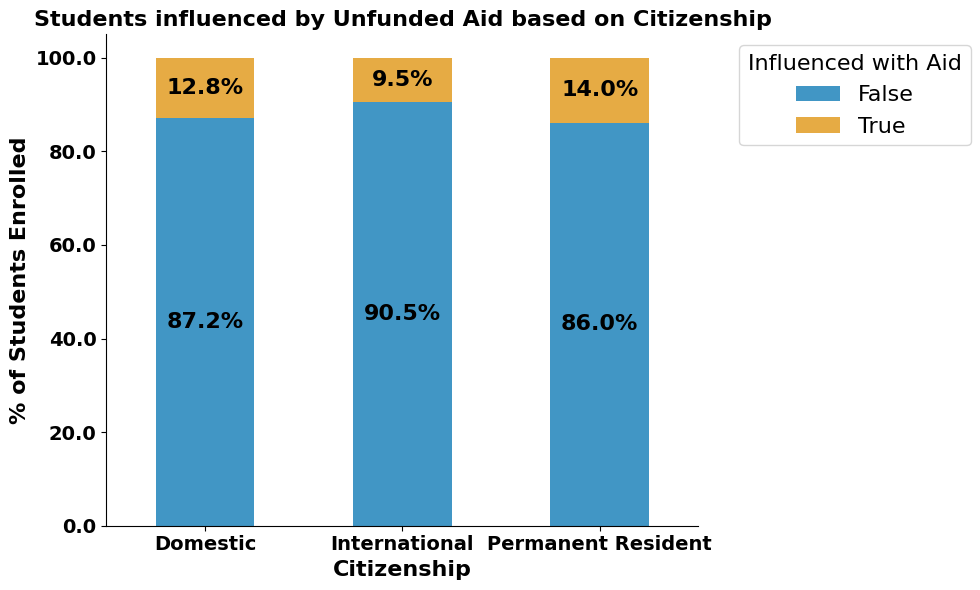

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_16610/981497113.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14, fontweight='bold')


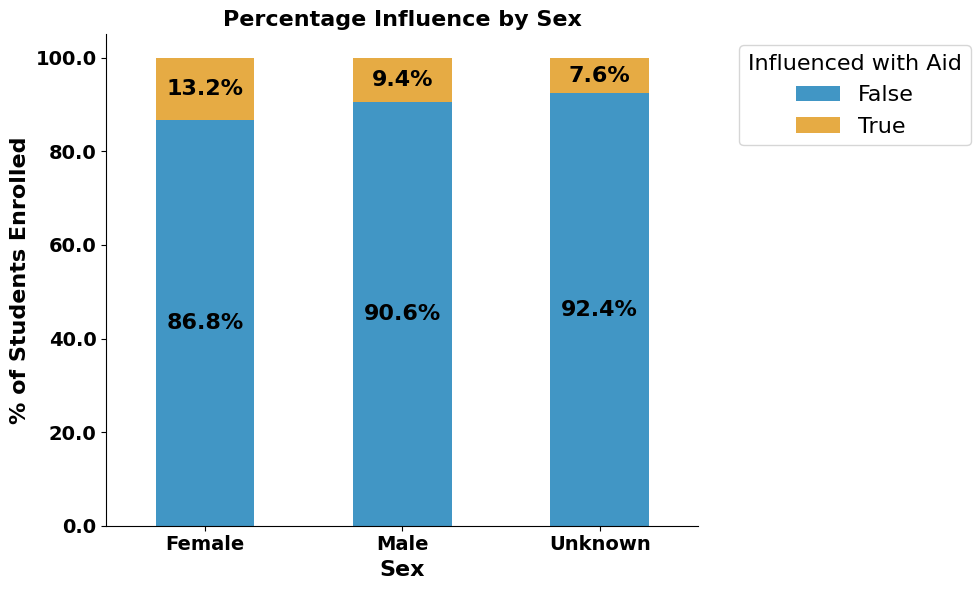

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_16610/981497113.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14, fontweight='bold')


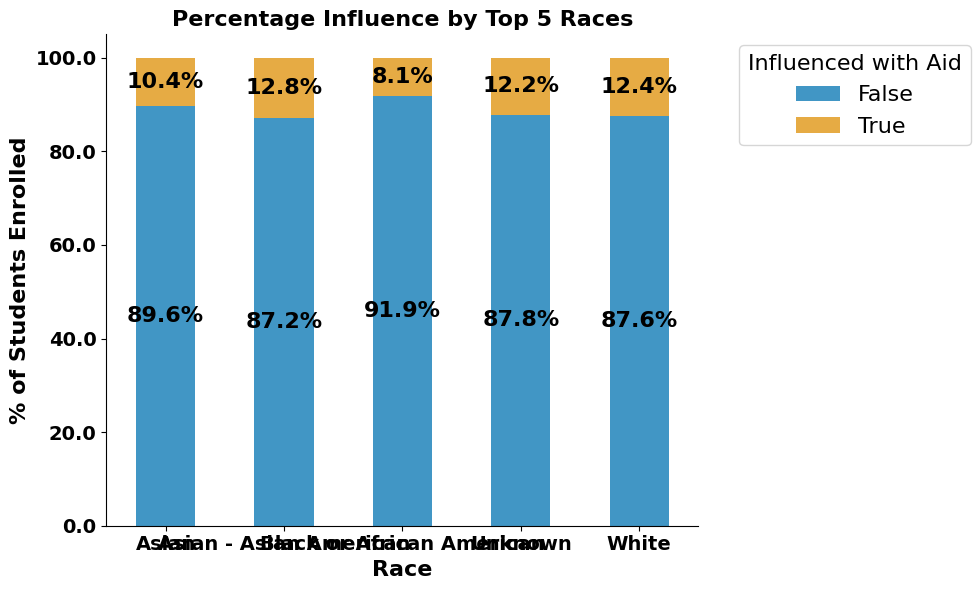

In [21]:
# Adjust scholarship values for 2022-G1 with $0
data['Application Scholarship Tier'] = data['Application Scholarship Tier'].replace('2022-G1 - $0', '2022-G0 - $0')

# Update the 'Scholarship Amount' based on the corrected tier
data['Scholarship Amount'] = data['Application Scholarship Tier'].apply(
    lambda x: int(x.split('- $')[-1]) if '$' in x else 0
)

# Define decision categories
influenced_decision_categories = [
    'Admit Conditional', 'Admit Conditional & Bridge', 'Admit Conditional & Probationary',
    'Admit Probation', 'Admit Regular', 'Deposit - Not Required', 'Deposit Paid',
    'Deposit Waived/Not Required'
]

not_influenced_decision_categories = [
    'Admit Declined - Post Enroll(CF)', 'No Show - Post Enroll(CF)', 'Admit Declined'
]

# Define 'Influenced with Aid' and 'Not Influenced with Aid'
data['Influenced with Aid'] = data.apply(
    lambda row: row['Scholarship Amount'] > 0 and row['Registered in Colleague'] == 1 and
                row['Decision Reason'] in influenced_decision_categories, axis=1
)

data['Not Influenced with Aid'] = data.apply(
    lambda row: row['Scholarship Amount'] > 0 and (row['Registered in Colleague'] == 0 or
                                                  row['Decision Reason'] in not_influenced_decision_categories), axis=1
)

# Categorize citizenship and standardize sex
citizenship_map = {'US': 'Domestic', 'PR': 'Permanent Resident', 'FN': 'International'}
sex_map = {'M': 'Male', 'F': 'Female'}
data['Citizenship Category'] = data['Person Citizenship Status'].map(citizenship_map).fillna('Unknown')
data['Standardized Sex'] = data['Person Sex'].map(sex_map).fillna('Unknown')

# Filter out unknown citizenship
filtered_data = data[data['Citizenship Category'] != 'Unknown']

# Plotting function with external legend
def plot_percentage_with_external_legend(df, x, hue, title, xlabel):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    group_counts = df.groupby(x)[hue].count()
    hue_counts = df.groupby([x, hue]).size().unstack()
    hue_percentage = hue_counts.div(group_counts, axis=0) * 100
    bars = hue_percentage.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"), alpha=0.75)
    ax.set_ylabel('% of Students Enrolled', fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=16, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')
    for bar in bars.containers:
        ax.bar_label(bar, fmt='%.1f%%', label_type='center', fontsize=16, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=16, fontweight='bold')
    ax.set_yticklabels(ax.get_yticks(), fontsize=14, fontweight='bold')
    plt.legend(title=hue, title_fontsize='16', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, frameon=True)
    plt.tight_layout()
    plt.grid(False)
    sns.despine(left=False, bottom=False)  # To remove the borders
    plt.show()

# Generate plots
plot_percentage_with_external_legend(filtered_data, 'Citizenship Category', 'Influenced with Aid',
                                     'Students influenced by Unfunded Aid based on Citizenship', 'Citizenship')
plot_percentage_with_external_legend(data, 'Standardized Sex', 'Influenced with Aid',
                                     'Percentage Influence by Sex', 'Sex')
top_races = data['Person Race'].value_counts().nlargest(5).index
race_data = data[data['Person Race'].isin(top_races)]
plot_percentage_with_external_legend(race_data, 'Person Race', 'Influenced with Aid',
                                     'Percentage Influence by Top 5 Races', 'Race')


# Filter only influenced students
influenced_data = data[data['Influenced with Aid']]

# Plot for Influenced Students by Sex and Citizenship Status
plt.figure(figsize=(12, 7))
sns.countplot(x='Citizenship Category', hue='Standardized Sex', data=influenced_data, palette='colorblind')
plt.title('Distribution of Influenced Students by Sex and Citizenship Status', fontsize=16, fontweight='bold')
plt.xlabel('Citizenship Status', fontsize=14, fontweight='bold')
plt.ylabel('Count of Influenced Students', fontsize=14, fontweight='bold')
plt.legend(title='Sex', title_fontsize='13', loc='upper right', fontsize=12, frameon=True)
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

# Identify the top 5 races in the influenced dataset
top_races_influenced = influenced_data['Person Race'].value_counts().nlargest(5).index

# Plot for Influenced Students by Top 5 Races and Citizenship Status
plt.figure(figsize=(12, 7))
sns.countplot(x='Citizenship Category', hue='Person Race', data=influenced_data[influenced_data['Person Race'].isin(top_races_influenced)], palette='colorblind')
plt.title('Distribution of Influenced Students by Top 5 Races and Citizenship Status', fontsize=16, fontweight='bold')
plt.xlabel('Citizenship Status', fontsize=14, fontweight='bold')
plt.ylabel('Count of Influenced Students', fontsize=14, fontweight='bold')
plt.legend(title='Race', title_fontsize='13', loc='upper right', fontsize=12, frameon=True, bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()


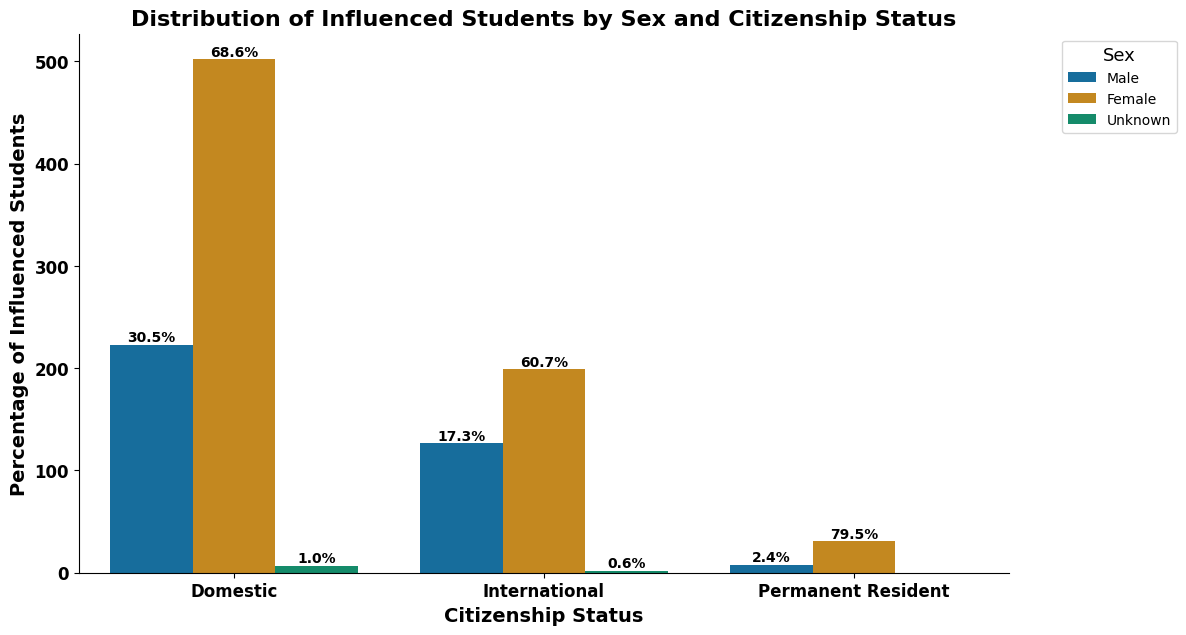

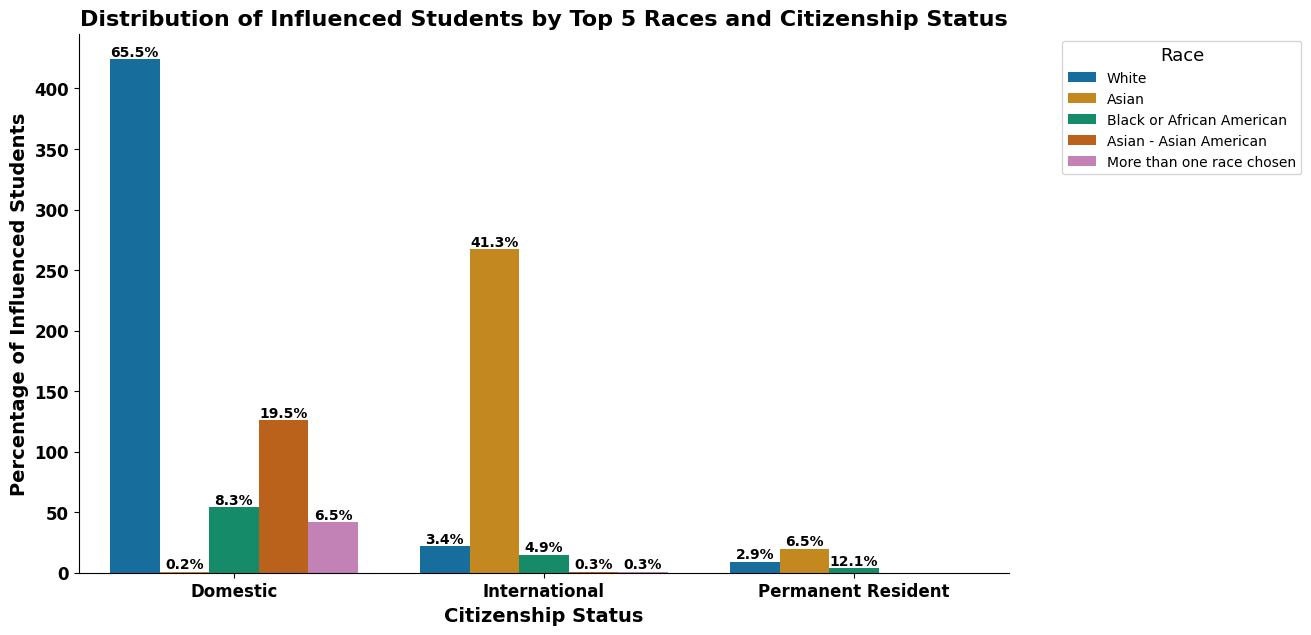

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has been loaded and the necessary preprocessing has been done:

# Filter only influenced students
influenced_data = data[data['Influenced with Aid']]

# Filter out 'Unknown' races
filtered_influenced_data = influenced_data[influenced_data['Person Race'] != 'Unknown']
top_races_influenced = filtered_influenced_data['Person Race'].value_counts().nlargest(5).index

# Helper function to add percentage labels to the bars
def add_percentage_labels(ax, data):
    total_counts = data.groupby('Citizenship Category').size()
    for p in ax.patches:
        height = p.get_height()
        if height == 0:  # Skip zero height bars
            continue
        category = p.get_x() + p.get_width() / 2.0
        total = total_counts.loc[data['Citizenship Category'].unique()[int(category)]]
        percentage = (height / total) * 100
        if percentage > 0:  # Only annotate bars with a non-zero percentage
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=10, fontweight='bold', color='black', xytext=(0, 5),
                        textcoords='offset points')

# Visualization for Influenced Students by Sex and Citizenship Status
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='Citizenship Category', hue='Standardized Sex', data=influenced_data, palette='colorblind')
plt.title('Distribution of Influenced Students by Sex and Citizenship Status', fontsize=16, fontweight='bold')
plt.xlabel('Citizenship Status', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Influenced Students', fontsize=14, fontweight='bold')
plt.legend(title='Sex', title_fontsize='13', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
add_percentage_labels(ax, influenced_data)
sns.despine(left=False, bottom=False)  # To remove the borders
plt.show()

# Visualization for Influenced Students by Top 5 Races and Citizenship Status
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='Citizenship Category', hue='Person Race', data=filtered_influenced_data[filtered_influenced_data['Person Race'].isin(top_races_influenced)], palette='colorblind')
plt.title('Distribution of Influenced Students by Top 5 Races and Citizenship Status', fontsize=16, fontweight='bold')
plt.xlabel('Citizenship Status', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Influenced Students', fontsize=14, fontweight='bold')
plt.legend(title='Race', title_fontsize='13', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
add_percentage_labels(ax, filtered_influenced_data[filtered_influenced_data['Person Race'].isin(top_races_influenced)])
sns.despine(left=False, bottom=False)  # To remove the borders
plt.show()


<Figure size 1200x700 with 0 Axes>

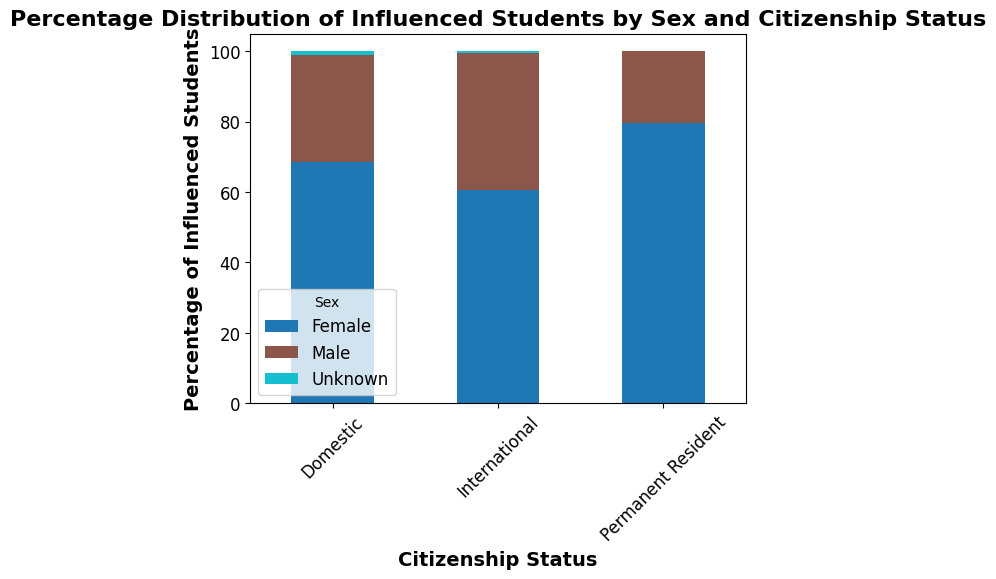

<Figure size 1200x700 with 0 Axes>

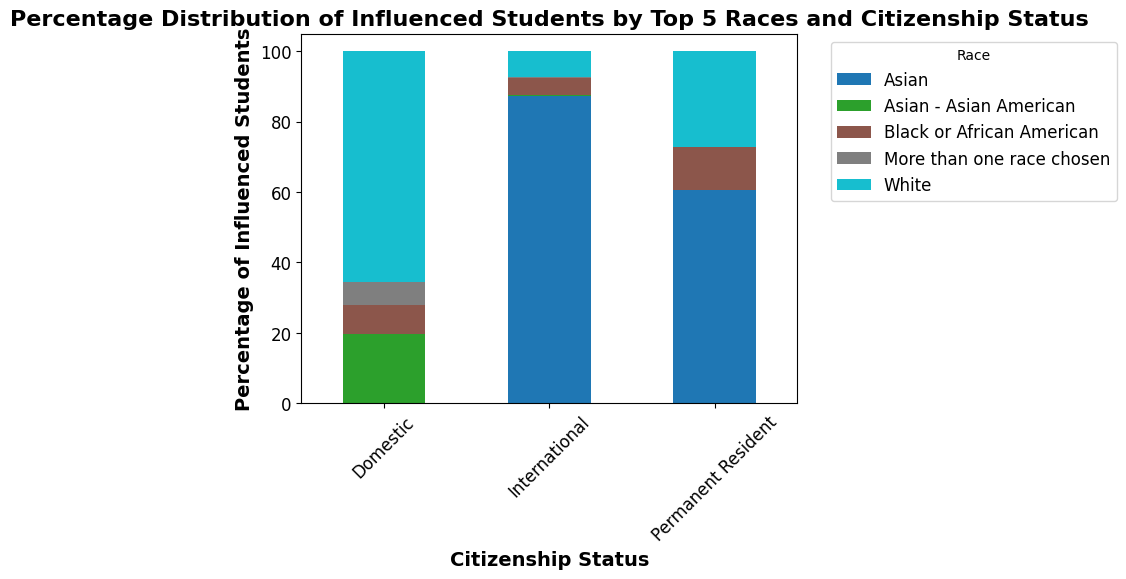

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has been loaded and the necessary preprocessing has been done:
# Filter only influenced students
influenced_data = data[data['Influenced with Aid']]

# Filter out 'Unknown' races
filtered_influenced_data = influenced_data[influenced_data['Person Race'] != 'Unknown']
top_races_influenced = filtered_influenced_data['Person Race'].value_counts().nlargest(5).index

# Calculate percentages for sex
sex_counts = influenced_data.groupby(['Citizenship Category', 'Standardized Sex']).size().unstack(fill_value=0)
sex_totals = sex_counts.sum(axis=1)
sex_percentages = sex_counts.div(sex_totals, axis=0) * 100

# Calculate percentages for races
race_counts = filtered_influenced_data[filtered_influenced_data['Person Race'].isin(top_races_influenced)].groupby(['Citizenship Category', 'Person Race']).size().unstack(fill_value=0)
race_totals = race_counts.sum(axis=1)
race_percentages = race_counts.div(race_totals, axis=0) * 100

# Plot for Influenced Students by Sex and Citizenship Status with percentages
plt.figure(figsize=(12, 7))
ax = sex_percentages.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Percentage Distribution of Influenced Students by Sex and Citizenship Status', fontsize=16, fontweight='bold')
plt.xlabel('Citizenship Status', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Influenced Students', fontsize=14, fontweight='bold')
plt.legend(title='Sex', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot for Influenced Students by Top 5 Races and Citizenship Status with percentages
plt.figure(figsize=(12, 7))
ax = race_percentages.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Percentage Distribution of Influenced Students by Top 5 Races and Citizenship Status', fontsize=16, fontweight='bold')
plt.xlabel('Citizenship Status', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Influenced Students', fontsize=14, fontweight='bold')
plt.legend(title='Race', fontsize=12, bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


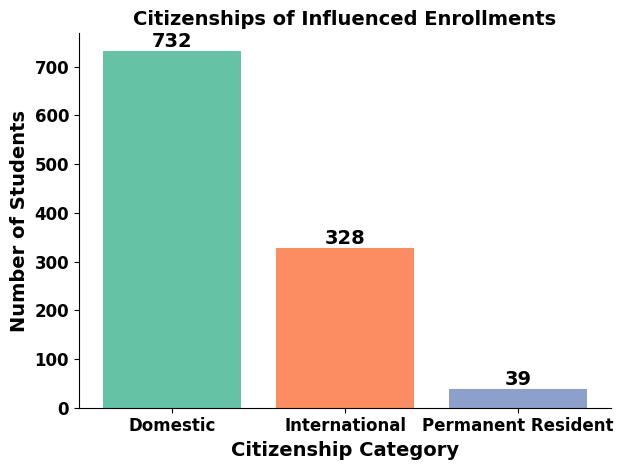

In [32]:
import matplotlib.pyplot as plt

# Data setup
citizenship_categories = ['Domestic', 'International', 'Permanent Resident']
values = [732, 328, 39]  # Corresponding numbers for US, FN, and PR

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(citizenship_categories, values, color=['#66c2a5', '#fc8d62', '#8da0cb'])

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, '%d' % yval, va='bottom', ha='center', fontweight='bold', fontsize=14)

ax.set_xlabel('Citizenship Category', fontweight='bold', fontsize=14)
ax.set_ylabel('Number of Students', fontweight='bold', fontsize=14)
ax.set_title('Citizenships of Influenced Enrollments', fontweight='bold', fontsize=14)

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
sns.despine(left=False, bottom=False)  # To remove the borders
plt.tight_layout()
plt.show()


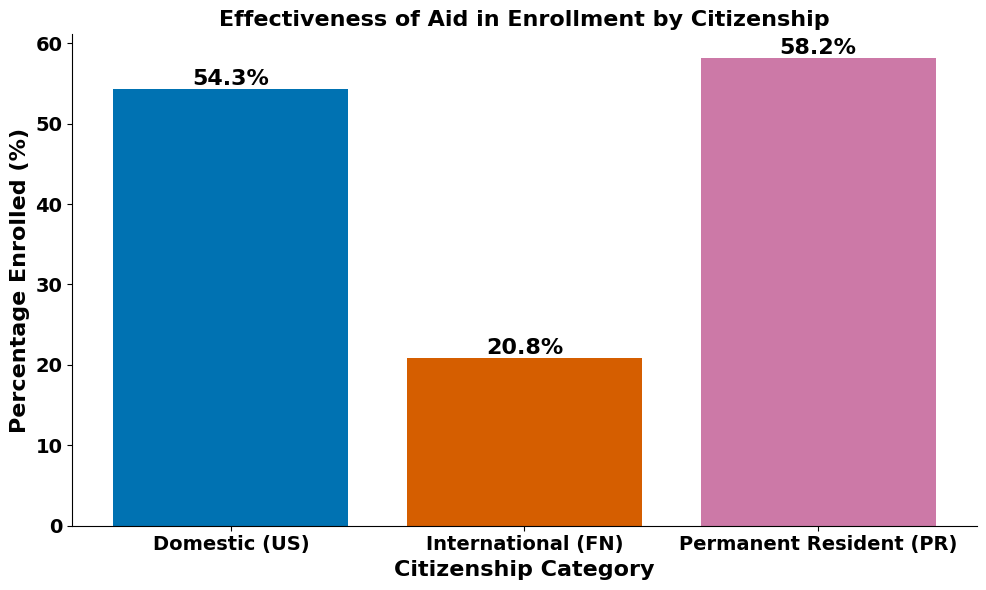

In [39]:
import matplotlib.pyplot as plt

# Data setup
categories = ['Domestic (US)', 'International (FN)', 'Permanent Resident (PR)']
percentage_enrolled = [54.3, 20.8, 58.2]  # Updated with actual values from your chart

# Accessible color palette
colors = ['#0072B2', '#D55E00', '#CC79A7']  # Blue, Orange, Pinkish purple

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
bars = ax.bar(categories, percentage_enrolled, color=colors)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center', fontweight='bold', fontsize=16)

# Set font sizes for axes labels and title
ax.set_xlabel('Citizenship Category', fontweight='bold', fontsize=16)
ax.set_ylabel('Percentage Enrolled (%)', fontweight='bold', fontsize=16)
ax.set_title('Effectiveness of Aid in Enrollment by Citizenship', fontweight='bold', fontsize=16)

# Font size for ticks and rotate x-axis labels for better visibility
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
sns.despine(left=False, bottom=False)  # To remove the borders
# Adjust layout to make sure everything fits and is legible
plt.tight_layout()

# Display the plot
plt.show()


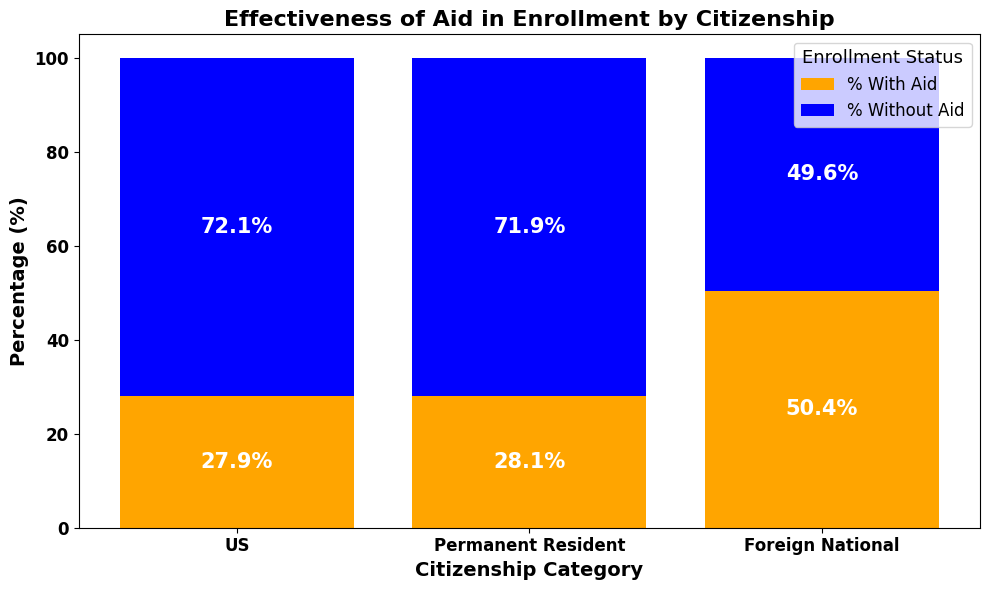

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data setup
data = pd.DataFrame({
    'Category': ['US', 'Permanent Resident', 'Foreign National'],
    'With Aid': [732, 39, 328],
    'Total Enrolled': [2620, 139, 651]
})
data['Without Aid'] = data['Total Enrolled'] - data['With Aid']
data['% With Aid'] = (data['With Aid'] / data['Total Enrolled']) * 100
data['% Without Aid'] = 100 - data['% With Aid']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(data['Category'], data['% With Aid'], color='orange', label='% With Aid')
bars2 = ax.bar(data['Category'], data['% Without Aid'], bottom=data['% With Aid'], color='blue', label='% Without Aid')

ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_title('Effectiveness of Aid in Enrollment by Citizenship', fontsize=16, fontweight='bold')
ax.set_xlabel('Citizenship Category', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
ax.legend(title='Enrollment Status', loc='upper right', title_fontsize='13', fontsize='12')

# Adding data labels more intelligently
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 5:  # Ensuring that the label is only added if there is enough space
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height/2),
                        xytext=(0, 0),  # no offset
                        textcoords="offset points",
                        ha='center', va='center', fontsize=15, fontweight='bold', color='white')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()
